## 03-03 Convolutional Layer

In [21]:
%matplotlib inline
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision import transforms
from PIL import Image

加载图片，并转换为Tensor

In [4]:
image_path = Path('./image/lena.png')
image_data = Image.open(image_path).convert('RGB')  # 0-255

image_transform = transforms.Compose([transforms.ToTensor()])
image_tensor = image_transform(image_data)
image_tensor.unsqueeze_(dim=0)  # C*H*W -> B*C*H*W
image_tensor.shape

torch.Size([1, 3, 512, 512])

定义卷积操作函数

In [12]:
def make_conv(conv_layer, image_tensor):
    nn.init.xavier_normal_(conv_layer.weight.data)
    image_conv = conv_layer(image_tensor)
    return image_conv

定义还原图片操作，将Tensor转换为Image


In [28]:
def inverse_transform(img_tensor):
    # C*H*W -> H*W*C
    img_tensor = img_tensor.transpose(0, 2).transpose(0, 1)
    # 将tensor转换为0-255的ndarray
    img_array = np.array(img_tensor.detach()) * 255

    # 对3通道和单通道不同处理
    if img_array.shape[2] == 3:
        return Image.fromarray(img_array.astype('uint8')).convert('RGB')
    else:
        return Image.fromarray(img_array.astype('uint8').squeeze())

定义可视化函数


In [29]:
def visualization(image_conv, image_tensor):
    print('Before Conv:', image_tensor.shape)
    print('After Conv:', image_conv.shape)
    inverse_raw = inverse_transform(image_tensor.squeeze())
    inverse_conv = inverse_transform(image_conv[0, 0:1, ...])
    plt.subplot(121).imshow(inverse_raw)
    plt.subplot(122).imshow(inverse_conv)
    plt.show()


进行2维卷积操作

Before Conv: torch.Size([1, 3, 512, 512])
After Conv: torch.Size([1, 1, 510, 510])


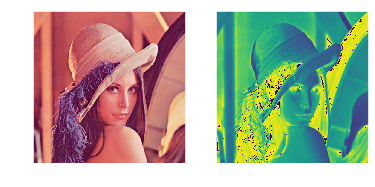

In [31]:
image_conv = make_conv(nn.Conv2d(3, 1, 3), image_tensor)
visualization(image_conv, image_tensor)

进行2维转置卷积操作

Before Conv: torch.Size([1, 3, 512, 512])
After Conv: torch.Size([1, 1, 1025, 1025])


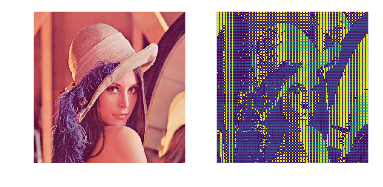

In [32]:
image_conv = make_conv(nn.ConvTranspose2d(3, 1, 3, stride=2), image_tensor)
visualization(image_conv, image_tensor)